In [1]:
# full import

# data handling
import numpy as np
import pandas as pd
from sklearn import datasets

np.random.seed(42)

# plotting 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# model
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# pipeline
from sklearn.pipeline import Pipeline

In [2]:
# a Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model
# capable of performing linear or nonlinear classification, regression, and even outlier detection
# it is one of the most popular models in Machine Learning, and every one should have it in their toolbox
# SVMs are particularly well suited for classification of complex but small or medium-sized datasets

# this chapter will explain the core concepts of SVMs, how to use them, and how they work

# Linear SVM Classification


The fundamental idea behind SVMs is best explained with some pictures. (Watch the next code cell for the demonstration).

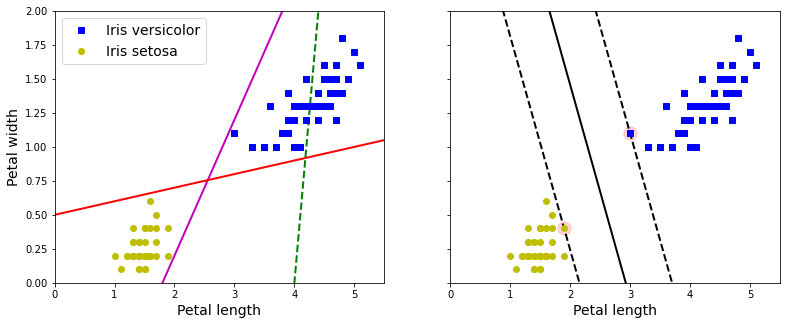

In [3]:
# this figure shows part of the iris dataset that was introduced at the end of Chapter 4
# the two classes can clearly be separated easily with a straght line (they are "linearly separable")


# first let's generate and train the data
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)


# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    # At the decision boundary, w0*x0 + w1*x1 + b = 0 (function for a line)
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1] 
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA', alpha=0.5) # plot the support vectors (red circles)
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)


fig, axes = plt.subplots(ncols=2, figsize=(13, 5), sharey=True)

# plot the bad models
plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
_ = plt.axis([0, 5.5, 0, 2])

# plot the good models (SVM)
plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
plt.xlabel("Petal length", fontsize=14)
_ = plt.axis([0, 5.5, 0, 2])


# the left plot shows the decision boundaries of three possible linear classifiers
#   # the model whose decision boundary is represented by the dashed line is so bad that it does not even separate the classes properly
#   # the other two models work perfectly on this training set
#   # but their decision boundaries come so close to the instances that these models will probably not perform as well on new instances
# the solid lines in the plot on the right represents the decision boundary of an SVM classifier
#   # this line not only separates the two classes but also stays as far away from the closest training instances as possible
# you can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes
# this is called "large margin classification"

# notice that adding more training instances "off the street" will not affect decision boundary at all
# it is fully determined (or "supported") by the instances located on the edge of the street
# these instances are called the "support vectors" (they are circled in the figure)

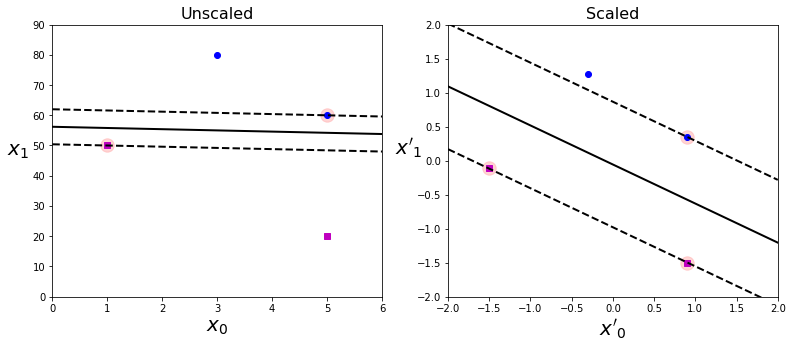

In [4]:
# SVMs are sensitive to the feature scales, as you can see in the following figure


from sklearn.preprocessing import StandardScaler

# generate data
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# create a SVM and train it
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(13, 5))

# plot the bad model
plt.subplot(121)
plt.plot(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], "bo")
plt.plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
_ = plt.axis([0, 6, 0, 90])

# create a SVM and train it after the data is scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

# plot the good model
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys == 1], X_scaled[:, 1][ys == 1], "bo")
plt.plot(X_scaled[:, 0][ys == 0], X_scaled[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
_ = plt.axis([-2, 2, -2, 2])

# on the left plot:
#   # the vertical scale is much larger than the horizontal scale
#   # so the widest possible street is close to horizontal
# on the right plot:
#   # after feature scaling, the decision boundary looks much better

## Soft Margin Classification


If we strictly impose that all instances be off the street and on the right side, this is called **hard margin classification**. There are two main issues with this approach:
- First, it only works if the data is *linearly separable*.
- Second, it is quite sensitive to outliers


To avoid these issues, it is preferable to use a more flexible model, called **soft margin classification**. The objective is to find a good balance between:
- Keeping the street as large as possible.
- Limitting the **margin violations** (i.e. the instances that end up in the middle of the street or even on the wrong side). 

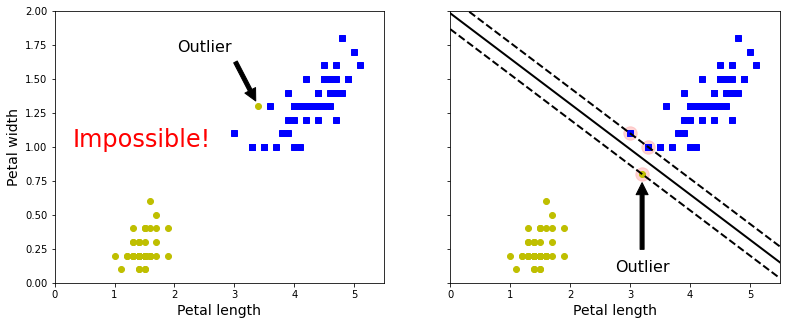

In [5]:
# this figure shows the iris dataset with just one additional outlier
# on the left:
#   # it is impossible to find a hard margin
# on the right:
#   # the decision boundary ends up very different from the one we saw earlier (with out the outlier)
#   # and it will probably not generalize as well

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(13, 5), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1 == 1], Xo1[:, 1][yo1 == 1], "bs")
plt.plot(Xo1[:, 0][yo1 == 0], Xo1[:, 1][yo1 == 0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier", xy=(X_outliers[0][0], X_outliers[0][1]), xytext=(2.5, 1.7), 
             ha="center", arrowprops=dict(facecolor='black', shrink=0.1), fontsize=16)
_ = plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2 == 1], Xo2[:, 1][yo2 == 1], "bs")
plt.plot(Xo2[:, 0][yo2 == 0], Xo2[:, 1][yo2 == 0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier", xy=(X_outliers[1][0], X_outliers[1][1]), xytext=(3.2, 0.08),
             ha="center", arrowprops=dict(facecolor='black', shrink=0.1), fontsize=16)
_ = plt.axis([0, 5.5, 0, 2])

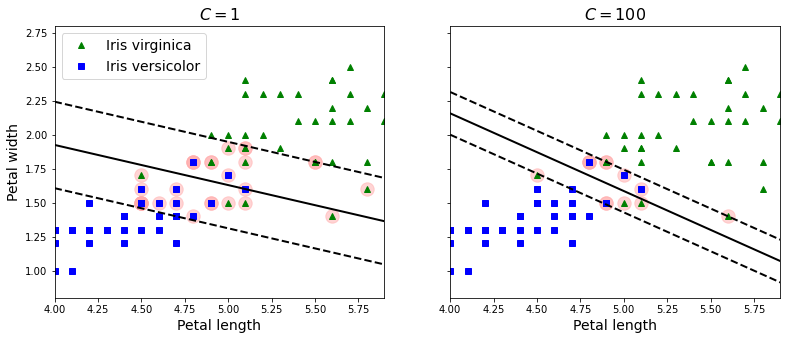

In [6]:
# in scikit-learn SVM classes, you can control this balance using the "C" hyperparameter
# a small "C" value leads to a wider street but more margin violations

# this figure shows the decision boundaries and margins of two soft margin SVM classifiers on a nonlinear separable dataset
# on the left: (using a low C value)
#   # the margin is quite large, but many instances end up on the street
# on the right: (using a high C value)
#   # the margin is smaller, but there are fewer margin violations
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", max_iter=10**5, random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", max_iter=10**5, random_state=42)

scaled_svm_clf1 = Pipeline([("scaler", scaler), ("linear_svc", svm_clf1)])
scaled_svm_clf2 = Pipeline([("scaler", scaler), ("linear_svc", svm_clf2)])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]


fig, axes = plt.subplots(ncols=2, figsize=(13, 5), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
_ = plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
_ = plt.axis([4, 5.9, 0.8, 2.8])

# it seems likely that the first classifier will generalize better
# in fact, on this training set, it makes fewer prediction errors
# since most of the margin violations are actually on the correct side of the decision boundary

In [7]:
# the following sk-learn code does the following: 
#   # loads the iris dataset
#   # scales the features
#   # trains a linear SVM model using C=1 and the "hinge loss" function (describe shortly)
# the resulting model is the one on the preceding figure (the left plot with C=1)

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

np.random.seed(42)

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica = 1, else = 0

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svm", LinearSVC(C=1, loss="hinge"))
])
# alternatively, you can use the SVC class like this: 
#   SVC(kernel="linear", C=1) 
#   # but it is much slower, especially with large training sets, so it is not recommended

# another option is to use the SGDClassifier class: 
#   SGDCLassifier(loss="hinge", alpha=1/(m*C))
#   # this applies regular Stochastic Gradient Descent to train a linear SVM classifier
#   # it does not converge as fast as the LinearSVC class
#   # but it can be useful to handle huge datasets that do not fit in memory (out-of-core training)
#   # or to handle online classification tasks


svm_clf.fit(X, y)

# then, as usual, you can use the model to make predictions
svm_clf.predict([[5.5, 1.7]])

array([1.])

# Nonlinear SVM Classification


Although SVM Classifiers are efficient and work surprisingly well in many cases, many datasets are not even close to being linearly separable. One approach is to add more features, such as polynomial features (as you did in chapter 4); in some cases this can result in a linearly separable dataset.

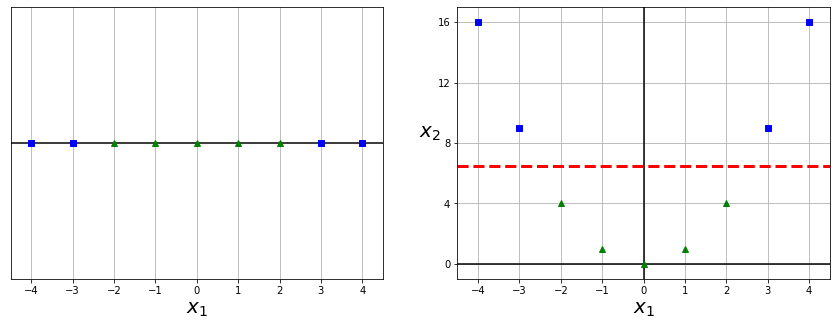

In [8]:
# this figure represents a simple dataset with just one feature x1
# this dataset (left) is not linearly separable
# but if you add a second feature x2 = (x1)^2, the resulting 2D dataset is perfectly linearly separable

X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(13, 5))

# plot the left 
plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y == 0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y == 1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

# plot the right
plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y == 0], X2D[:, 1][y == 0], "bs")
plt.plot(X2D[:, 0][y == 1], X2D[:, 1][y == 1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

_ = plt.subplots_adjust(right=1)

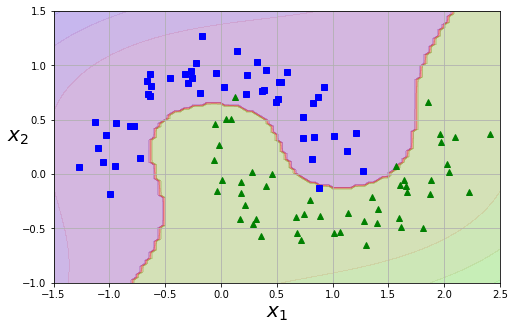

In [9]:
# let's test this on the moons dataset:
# this is a toy dataset for binary classification in which the data points are shaped as two interleaving half circles

from sklearn.preprocessing import PolynomialFeatures

X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
    ("poly_feats", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=10**5))
])
polynomial_svm_clf.fit(X, y)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

fig, ax = plt.subplots(figsize=(8, 5))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

## Polynomial Kernel


Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs), but:
- At a low polynomial degree it cannot deal with very complex datasets. 
- With high polynomial degree it creates a huge number of features, making the model too slow


Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the **kernel trick**. 
- It makes it possible to get the same result as if you added many polynomial features, even with very high degree polynomials, without actually having to add them. 
- So there is no combinatorial explosion of the number of features since you don't actually add any features.
- This trick is implemented by the `SVC` class.

In [10]:
# let's test it on the moons datasets
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

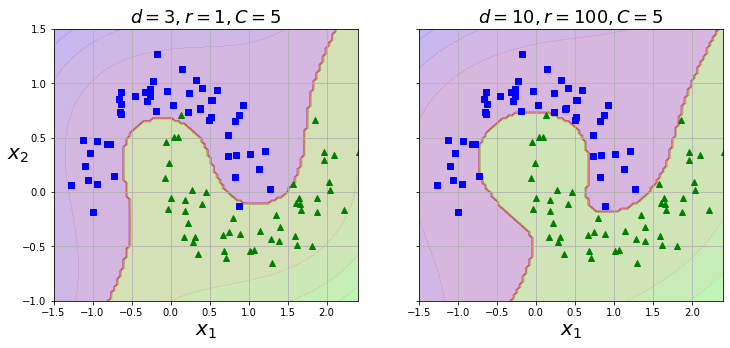

In [11]:
# this figure demonstrate the Polynomial kernel
# on the left:
#   # SVM classifier using a 3-degree polynomial kernel
# on the right:
#   # SVM classifier using a 10-degree polynomial kernel
# if your model is overfitting, you might want to reduce the polynomial degree (vice versa)
# the hyperparamter coef0 controls how much the model is influenced by high-degree polynomials versus low-degree polynomials

# dataset for the right plot
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
_ = plt.ylabel("")

## Adding Similarity Features


Another technique to tackle nonlinear problems is to add features computed using a **similarity function** that:
- measures how much each instance resembles a particular **landmark**.


Here we show one similarity function, the **Guassian Radial Basis Function** (**RBF**):
> $\phi_\gamma\left(x, l\right) = exp\left(-\gamma\|x-l\|^2\right)$


**Notation**:
- It is a bell-shaped function varying from $0$ (very far away from the landmark) to $1$ (at the landmark).

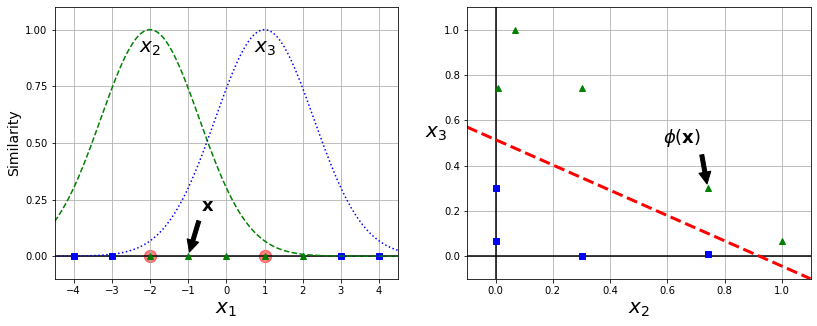

In [12]:
# let's take the one-dimensional dataset discussed earlier 
# and add two landmarks to it at (x1 = -2) and (x1 = 1)
# next, we defind the RBF similarity function
# now we are ready to compute the new features
# example:
# let's look at the instance x1 = -1: (noted on the left plot)
#   # it is located at a distance of 1 from the first landmark, and 2 from the second landmark
#   # therefore its new features are:
#   # x2 = exp(-0.3 * 1^2) = 0.74
#   # x3 = exp(-0.3 * 2^2) = 0.30
# the plot on the right shows the transformed dataset (dropping the original features)
# as you can see, it is now linearly separable



# calculate the similarity function
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3


x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(12, 5))

# plot the left side
plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk == 0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk == 1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$', xy=(X1D[3, 0], 0), xytext=(-0.5, 0.20),
             ha="center", arrowprops=dict(facecolor='black', shrink=0.1), fontsize=18)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

# plot the right side
plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk == 0], XK[:, 1][yk == 0], "bs")
plt.plot(XK[:, 0][yk == 1], XK[:, 1][yk == 1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$', xy=(XK[3, 0], XK[3, 1]), xytext=(0.65, 0.50),
             ha="center", arrowprops=dict(facecolor='black', shrink=0.1), fontsize=18)
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

_ = plt.subplots_adjust(right=1)

# you may wonder how to select the landmarks
# the simplest approach is to create a landmark at the location of each and every instance in the dataset
# this creates many dimensions 
#   # and thus increases the chances that the transformed training set will be linearly separable
# the downside is that 
#   # a training set with "m instances and n features" 
#   # gets transformed into a training set with "m instances and m features" 
#   # (assuming you drop the original features)
# if your training set is very large, you end up with an equally large number of features

## Guassian RBF Kernel


Just like the polynomial features method:
- The similarity features method can be useful with any Machine Learning algorithm.
- But it may be computationally expensive to compute all the additional features, especially on large training sets.


However, once again the kernel trick does its SVM magic: 
- It makes it possible to obtain a similar result as if you had added many similar features, without having to add them.

In [13]:
# let's try the Guassian RBF Kernel using the SVC class

rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

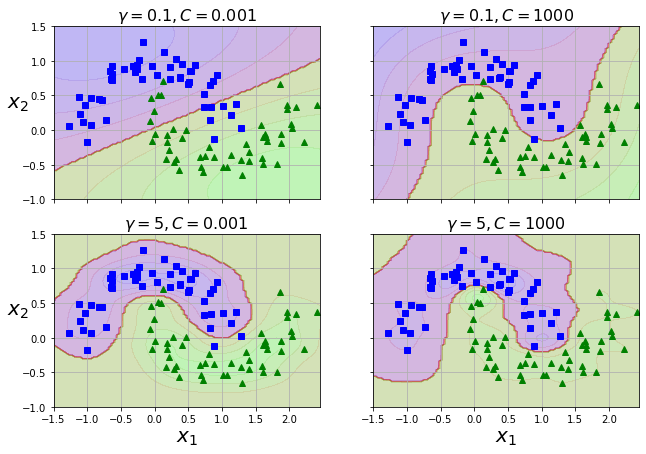

In [14]:
# this figure demonstrate the Guassian RBF Kernel with different gamma and C
# increasing gamma makes the bell-shape curve narrower
#   # as a result, each instance's range of influence is smaller:
#   # the decision boundary ends up being more irregular, wiggling around individual instances
# conversely, a small gamma value makes the bell-shape curve wider
#   # so the instances have a larger range of influence
#   # and the decision boundary ends up smoother
# so gamma acts like a regularization hyperparameter: (similar to the C hyperparameter)
#   # if your model is overfitting, you should reduce it
#   # if your model is underfitting, you should increase it

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(
    10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

# other kernels exist but are used more rarely (read books or online documentations for more)

## Computational Complexity


The `LinearSVC` class: 
- Is based on the `liblinear` library, which implements an optimized algorithm for linear SVMs. 
- It does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features. 
    - Its training time complexity is roughly $O\left(m \times n\right)$.
- The algorithm takes longer if you require a very high precision.
    - This is controlled by the tolerance hyperparameter $\epsilon$ (called `tol` in Scikit-Learn).
    - In most classification tasks, the default tolerance is fine.
The `SVC` class:
- Is based on the `libsvm` library, which implements an algorithm that support the kernel trick.
- The training  time complexity is usually between $O\left(m^2 \times n\right)$ and $O\left(m^3 \times n\right)$.
    - Unfortunately, this means that it gets dreadfully slow when the number of training instances gets large.
    - This algorithm is perfect for complex but small or medium training sets.
- However, it scales well with the number of features, especially with **sparse features** (i.e. when each instance has few non-zero features).
    - In this case, the algorithm scales roughly with the average number of nonzero feature per instance.



Comparison of Scikit-Learn classes for SVM Classification.
|Class    |Time Complexity|Out-of-core support|Scaling required|Kernel Trick|
|---------|---------------|-------------------|----------------|------------|
|LinearSVC|$O\left(m \times n\right)$|No|Yes|No|
|SGDClassifier|$O\left(m \times n\right)$|Yes|Yes|No|
|SVC|$O\left(m^2 \times n\right)$ to $O\left(m^3 \times n\right)$|No|Yes|Yes|

<br>
<br>

---

# SVM Regression


As we mentioned earlier, the SVM algorithm is quite versatile: not only does it support linear and nonlinear classification, but it also supports linear and nonlinear regression. The trick is to reverse the objective:
- SVM Classification tries to fit the largest possible street between two classes while limiting margin violations. 
- SVM Regression tries to fit as many instances as possible on the the street while limitting margin violations (i.e. instances off the street).
- The width of the street is controlled by a hyperparameter $\epsilon$.
    - Adding more training instances within the margin does not affect the model's predictions;
    - Thus, the model is said to be: $\epsilon\text{-insensitive}$


To tackle nonlinear regression tasks, you can use a kernelized SVM model.


SVMs can also be used for outlier detection (see Scikit-Learn's documentation for more details).

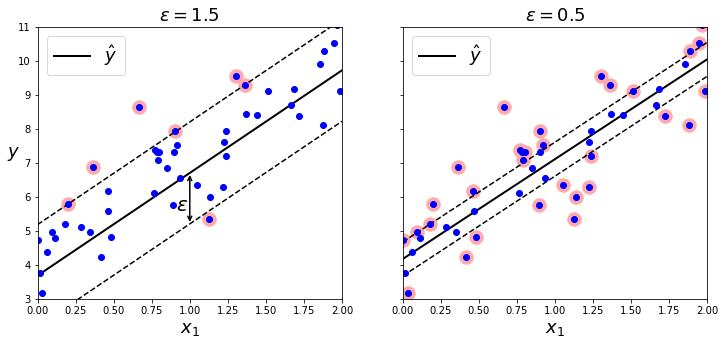

In [15]:
# the following figure plots two linear SVM Regression models train on some random linear data
# one with a large margin (e = 1.5)
# one with a small margin (e = 0.5)

# generate data
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()


from sklearn.svm import LinearSVR
# create and train models
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)


def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon) # find the points off the street
    return np.argwhere(off_margin)


svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])


def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_],
                s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)


fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate('', xy=(eps_x1, eps_y_pred), xycoords='data', xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
    textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5})

plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
_ = plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

Text(0.5, 1.0, '$degree=2, C=0.01, \\epsilon = 0.1$')

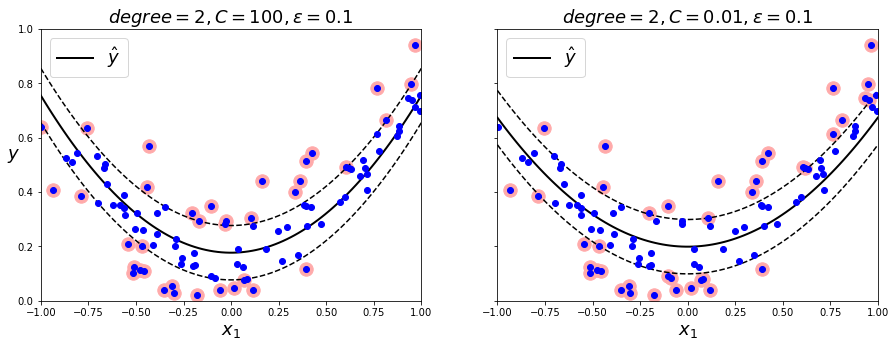

In [16]:
# this figure shows SVM Regression on a random quadratic training set
# using a 2-degree polynomial kernel

# create the data
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

from sklearn.svm import SVR
# create and train the models
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(15, 5), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)



# there is little regularization on the left plot (i.e. a large C value)
# and much more regularization on the right plot (i.e. a small C value)

# Under the Hood


- This section explains how SVMs make predictions and how their training algorithms work, starting with the linear SVM classifiers.
- You can safely skip it and go straight to the excercises at the end of this chapter if you are just getting started with Machine Learning.
- Come back later when you want to get a deeper understanding of SVMs.


In this chapter, we will use a different convention, which is more convenient (and more common) when you are dealing with SVMs:
- The **bias term** will be called $b$.
- The feature weights vector will be called $\bold{w}$.
- No bias feature will be added to the input feature vectors.

---

## Decision Function and Predictions


The linear SVM classifier model predicts the class of a new instance $x$ by simply computing the **decision function**:
> $\bold{w}^T x + b = \bold{w}_1x_1 + \bold{w}_2x_2+...+\bold{w}_nx_n + b$
- If the result is positive, the predicted class $\hat{y}$ is the positive class (1).
- If the result is negative, the predicted class $\hat{y}$ is the negative class (0).


Linear SVM classifier prediction:
> $\hat{y} = \left\{ \begin{array}{ll} 0 \hspace{5px}\text{if}\hspace{5px} \bold{w}^Tx+b <0 \\ 1 \hspace{5px}\text{if}\hspace{5px} \bold{w}^Tx+b \geqslant 0 \end{array}\right.$

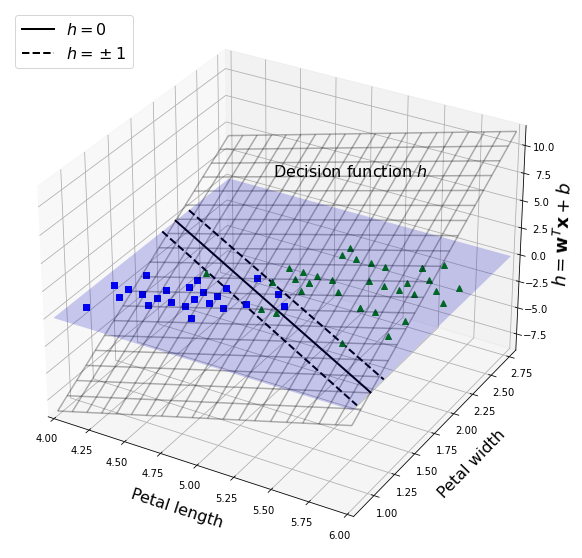

In [17]:
# this figure shows the decision function of a linear SVM classifier with 2 features
# the decision boundary is the set of points where the decision function is equal to 0
#   # it is the intersection of two planes, which is a straight line (represented by the thick solid line)
# the dashed lines represent the points where the decision function is equal to 1 or -1
#   # they are parallel and at equal distance to the decision boundary, forming a margin around it
# training a linear SVM classifier means finding the value of w and b that 
#   # makes this margin as wide as possible 
#   # while avoiding margin violations (hard margin) or limitting them (soft margin)

from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop == 1], X_crop[:, 1][y_crop == 1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop == 0], X_crop[:, 1][y_crop == 0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=16)
    ax.set_xlabel(r"Petal length", fontsize=16, labelpad=10)
    ax.set_ylabel(r"Petal width", fontsize=16, labelpad=10)
    ax.set_zlabel(
        r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18, labelpad=5)
    ax.legend(loc="upper left", fontsize=16)


fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

## Training Objective


$%\usepackage{asmath}$
Consider the slope of the decision function: 
- It is equal to the norm of the weight vector: $\|\bold{w}\|$. 
- If we divide this slope by $2$, the points where the decision function is equal to $\pm1$ are going to be twice as far away from the decision function.
- In other words, dividing the slope by $2$ will multiply the margin by $2$ (the smaller the weight vector $\bold{w}$, the larger the margin).


So we want to minimize $\|\bold{w}\|$ to get a large margin:
- However, if we also want to avoid any margin violation (hard margin), then we need to be: 
    - Greater than 1 for all positive training instances.
    - Lower than -1 for all negative training instances.
- If we define: 
    - $t^{(i)}=-1$ for negative instances (if $y^{(i)}=0$). 
    - $t^{(i)}=+1$ for positive instances $\hspace{1px}$ (if $y^{(i)}=1$).
- Then we can express this constraint as: $t^{(i)}\left(\bold{w}^Tx^{(i)}+b\right)\geqslant 1$ for all instances.
- We can therefore express the hard margin linear SVM classifier objective as the **constrained optimization** problem.


Hard margin linear SVM classifier objective:
> $\underset{\bold{w},b}{\text{minimize}}\hspace{3px}\left(\dfrac{1}{2}\bold{w}^T\bold{w}\right);\hspace{5px}\text{subject to:}\hspace{5px} t^{(i)}\left(\bold{w}^T\bold{w}^{(i)}+b\right)\geqslant 1$ for $i=1,2,...,m$ 


**Notation**:
- We are minimizing $\dfrac{1}{2}\bold{w}^T\bold{w}$, which is equal to $\dfrac{1}{2}\|\bold{w}\|^2$, rather than minimizing $\|w\|$.
- Indeed, $\dfrac{1}{2}\|\bold{w}\|^2$ has a nice and simpler derivative (it is just $\bold{w}$).
- While $\|\bold{w}\|$ is not differentiable at $\bold{w}=0$.
- Optimization algorithms work much better on diffentiable functions.    


To get the soft margin objective:
- We need to introduce a **slack variable**: $\zeta^{(i)}\geqslant 0$ for each instances.
    - $\zeta^{(i)}$ measures how much the $i^{th}$ instance is allowed to violate the margin. 
- We now have two conflicting objectives:
    - Making the slack variables $\zeta$ as small as possible to reduce margin violations.
    - Making $\dfrac{1}{2}\bold{w}^T\bold{w}$ as small as possible to increase the margin.
- This is where the $C$ hyperparameter comes in: 
    - It allows us to define the tradeoff between these two objectives.
- We can therefore express the soft margin linear SVM classifier as the **constrained optimization** problem.


Soft margin linear SVM classifier objective:
> $\underset{\bold{w}, b, \zeta}{\text{minimize}}\hspace{3px}\left(\dfrac{1}{2}\bold{w}^T\bold{w}\right) + C\sum_{i=1}^{m}\zeta^{(i)};\hspace{5px}\text{subject to:}\hspace{5px} t^{(i)}\left(\bold{w}^T\bold{w}^{(i)}+b\right)\geqslant 1 - \zeta^{(i)}\hspace{5px} \text{and}\hspace{5px} \zeta^{(i)}\geqslant 0$ for $i=1,2,...,m$ 

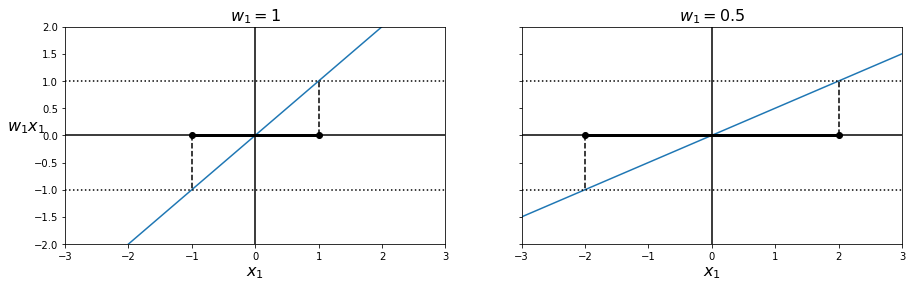

In [18]:
# this plot demonstrate the slope of the decision function:
# the smaller the weight vector w, the larger the margin

def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

fig, axes = plt.subplots(ncols=2, figsize=(15, 4), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)



## Quadratic Programming

## The Dual Problem

## Kernelized SVM

## Online SVMs